In [135]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

# balancear os dados
import imblearn
# valanceamento e clase - oversmpling
from imblearn.over_sampling import SMOTE

In [63]:
df = pd.read_csv('online_shoppers_intention.csv')

In [64]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Tratamento de dados

In [65]:
df1 = df

In [66]:
Trans_Revenue = df1['Revenue'].apply(lambda x:1 if x == True else 0)

In [67]:
Trans_Weekend = df1['Weekend'].apply(lambda x:1 if x == True else 0)

## Variaveis dummies

In [68]:
cat_feats1 = ['VisitorType']

In [91]:
df1= pd.get_dummies(df1,columns=cat_feats1,drop_first=True)


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  object 
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

In [71]:
cat_feats2 = ['Month']

In [93]:
df1 = pd.get_dummies(df1,columns=cat_feats2,drop_first=True)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [96]:
df1['Revenue'] = Trans_Revenue

In [97]:
df1['Weekend'] = Trans_Weekend

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

# Normalizando

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
scaler.fit(df1.drop('Revenue',axis=1))

StandardScaler()

In [103]:
scaled_features = scaler.transform(df1.drop('Revenue',axis=1))

# Ordenando o dataframe

In [115]:
df1 = df1[['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Revenue']]

In [116]:
df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.410621,-0.403582,8.124707,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.410621,-0.403582,8.124707,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.410621,-0.403582,8.124707,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.410621,-0.403582,8.124707,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.410621,-0.403582,8.124707,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175


In [126]:
df_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

# Variavel resposta esta balanceada?
#### Problemas de escala

<AxesSubplot:title={'center':'Venda ou não'}, xlabel='Revenue', ylabel='count'>

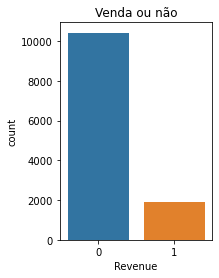

In [146]:
plt.subplot(1,2,2)
plt.title('Venda ou não')
sns.countplot(df1['Revenue'])

In [147]:
x = df_feat.drop('Revenue', axis=1)
y = df_feat.Revenue

In [148]:
np.bincount(y)

array([10422,  1908], dtype=int64)

instância o     smote

In [149]:
# sampling_strategy = 0.5
seed = 100
smote_bal = SMOTE(random_state= seed)

Aplica o SMOTE nos dados

In [150]:
X, Y = smote_bal.fit_resample(x,y)

Text(0.5, 0, 'Não compraram / compraram')

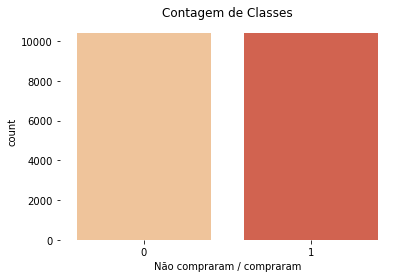

In [152]:
sns.countplot(Y,palette= 'OrRd')
plt.box(False)
plt.title('Contagem de Classes')

plt.xlabel('Não compraram / compraram')

In [153]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y, test_size=0.3,  random_state=42)

# Modelo rfb

In [154]:
modelo_v3 = svm.SVC(kernel='rbf')

In [155]:
# Faixa dos parametros que serão modificados para melhor convergencia
c_range = np.array([50.,100.,200.])
gamma_range = np.array([0.3,0.001,3*0.001])

In [156]:
# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = c_range)

In [159]:
# Grid search
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3,svm_param_grid,cv=3)

In [161]:
# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino,y_treino)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([ 50., 100., 200.]),
                         'gamma': array([0.3  , 0.001, 0.003])})

In [162]:
print(f'Acurácia em treinamento:{modelo_v3_grid_search_rbf.best_score_ :.2%}')
print(f'Hiperparâmentros Ideais:{modelo_v3_grid_search_rbf.best_params_}')

Acurácia em treinamento:92.30%
Hiperparâmentros Ideais:{'C': 50.0, 'gamma': 0.3}


In [163]:
previsao_v3 = modelo_v3_grid_search_rbf.predict(X_teste)

In [164]:
SVM_dict_v3={'Modelo':'SVM',
            'Versão':'3',
            'Kernel':'Otimização de hiperparâmetros com Grid Search e kernel RBF',
            'Precision':precision_score(previsao_v3,y_teste),
            'Recall':recall_score(previsao_v3,y_teste),
            'F1 Score':f1_score(previsao_v3,y_teste),
            'Acurácia':accuracy_score(previsao_v3,y_teste),
            'AUC':roc_auc_score(previsao_v3,y_teste)}

In [165]:
SVM_dict_v3

{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Otimização de hiperparâmetros com Grid Search e kernel RBF',
 'Precision': 0.9709358032577451,
 'Recall': 0.9223300970873787,
 'F1 Score': 0.9460090244281936,
 'Acurácia': 0.9445155100735529,
 'AUC': 0.9457830336687739}

In [ ]:
{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Otimização de hiperparâmetros com Grid Search e kernel RBF',
 'Precision': 0.9108910891089109,
 'Recall': 0.8876439464674759,
 'F1 Score': 0.8991172761664564,
 'Acurácia': 0.8976654940837864,
 'AUC': 0.897948905164024}